In [4]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [21]:
series = pd.read_csv('odd_data.csv', encoding='gbk')

In [22]:
series = series['产品1']

In [23]:
m = Prophet(daily_seasonality=True)
m.fit(series)

future = m.make_future_dataframe(periods=pred_dura)
forecast = m.predict(future)
pred_rs = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(pred_dura)
pred_rs['ds'] = pred_rs['ds'].astype(str)
pred_rs.columns=['时间', '预测值', '置信下限', '置信上限']

yhat = forecast['yhat']
yhat = list(yhat)
growth_rate = round(((yhat[-1] - yhat[-pred_dura]) / yhat[-pred_dura]), 4)


ds = forecast['ds']
yhat = forecast['yhat']
yhat_upper = forecast['yhat_upper']
yhat_lower = forecast['yhat_lower']

NameError: name 'Prophet' is not defined

In [4]:
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat

In [5]:
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return np.array(diff)

In [17]:
X = series.values
size = len(X) - 7
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
# rmse = math.sqrt(sklearn.metrics.mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=134994.030, expected=132559.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=135924.185, expected=138126.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=141678.392, expected=143710.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=147350.014, expected=145543.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=148794.640, expected=148739.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=152830.277, expected=150013.000
>predicted=152292.533, expected=156783.000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
yhat

152292.53309029003

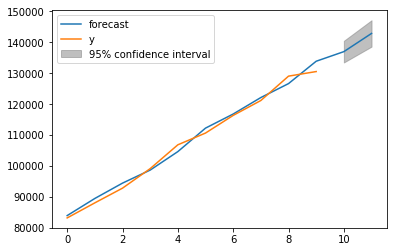

In [16]:
X = series.values
X = X.astype('float32')
size = 24
train, test = X[0:size], X[size:]
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit(disp=False)
model_fit.plot_predict(len(train)-10, len(train)+1)
pyplot.show()

In [14]:
model_fit.predict(32, 40)

array([4080.51850425, 4876.20470519, 5054.13190773, 5485.77954482,
       5810.88733729, 5912.05655138, 5946.78406516, 5941.72125239,
       5884.75027976, 5797.65687931, 5699.36467549])

In [7]:
series = {'X': [5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5], 
          'y': [22.33607398, 21.65467565, 20.97327732, 20.29187899, 19.61048066,
       18.92908233, 18.247684  , 17.56628567, 16.88488734, 16.20348901,
       15.52209068]}

In [8]:
X = pd.Series([1, 2, 3])

In [9]:
y = pd.Series([4, 5, 6])

In [11]:
df = pd.DataFrame()

In [12]:
df['X'] = X
df['y'] = y

In [17]:
dic = df.to_dict(orient='records')

In [18]:
dic

[{'X': 1, 'y': 4}, {'X': 2, 'y': 5}, {'X': 3, 'y': 6}]

In [20]:
tmp = {'result': {'origin_y': 18.92908233, 'rate_series': [{'X': 5.5, 'y': 22.336073983161043}, {'X': 5.6, 'y': 21.654675653203526}, {'X': 5.7, 'y': 20.97327732324601}, {'X': 5.8, 'y': 20.291878993288492}, {'X': 5.9, 'y': 19.610480663330975}, {'X': 6.0, 'y': 18.929082333373515}, {'X': 6.1, 'y': 18.247684003415998}, {'X': 6.2, 'y': 17.56628567345848}, {'X': 6.3, 'y': 16.884887343500964}, {'X': 6.4, 'y': 16.203489013543447}, {'X': 6.5, 'y': 15.52209068358593}], 'start_amount_series': [{'X': 0, 'y': 18.92826280481188}, {'X': 1000, 'y': 19.064850898411805}, {'X': 2000, 'y': 19.201438992011788}, {'X': 3000, 'y': 19.33802708561177}, {'X': 4000, 'y': 19.474615179211696}, {'X': 5000, 'y': 19.611203272811622}, {'X': 6000, 'y': 19.747791366411604}, {'X': 7000, 'y': 19.884379460011587}, {'X': 8000, 'y': 20.020967553611513}, {'X': 9000, 'y': 20.15755564721144}, {'X': 10000, 'y': 20.29414374081142}], 'term_series': [{'X': 1, 'y': 3.993172355460729}, {'X': 2, 'y': 6.980354351043275}, {'X': 3, 'y': 9.96753634662582}, {'X': 4, 'y': 12.954718342208366}, {'X': 5, 'y': 15.941900337790912}, {'X': 6, 'y': 18.929082333373458}, {'X': 7, 'y': 21.916264328956004}, {'X': 8, 'y': 24.903446324538606}, {'X': 9, 'y': 27.890628320121152}, {'X': 10, 'y': 30.877810315703698}, {'X': 11, 'y': 33.864992311286244}], 'origin_pt': {'rate': 6, 'start_amount': 6, 'term': 6}}}

In [23]:
tmp['result']['rate_series']

[{'X': 5.5, 'y': 22.336073983161043},
 {'X': 5.6, 'y': 21.654675653203526},
 {'X': 5.7, 'y': 20.97327732324601},
 {'X': 5.8, 'y': 20.291878993288492},
 {'X': 5.9, 'y': 19.610480663330975},
 {'X': 6.0, 'y': 18.929082333373515},
 {'X': 6.1, 'y': 18.247684003415998},
 {'X': 6.2, 'y': 17.56628567345848},
 {'X': 6.3, 'y': 16.884887343500964},
 {'X': 6.4, 'y': 16.203489013543447},
 {'X': 6.5, 'y': 15.52209068358593}]